# Authenticate

In [1]:
import sagemaker, boto3
from sagemaker import get_execution_role
from sagemaker import image_uris, model_uris, instance_types
from sagemaker.model import Model
from sagemaker.pytorch import PyTorchModel
from sagemaker.tensorflow import TensorFlowModel
from sagemaker.huggingface import HuggingFaceModel
from sagemaker.predictor import Predictor
from sagemaker.utils import name_from_base

# aws_role = get_execution_role()
aws_role = "arn:aws:iam::207285235248:role/service-role/AmazonSageMaker-ExecutionRole-20230327T105210"
aws_region = "us-west-2"
session = sagemaker.Session()


print(aws_role)
print(aws_region)
print(session)

arn:aws:iam::207285235248:role/service-role/AmazonSageMaker-ExecutionRole-20230327T105210
us-west-2


# Upload model data

In [2]:
# s3_path = 's3://anthony-test-bucket-2/sagemaker_models/pokemon/model.tar.gz'
upload_path = session.upload_data(path='model.tar.gz', bucket='anthony-test-bucket-2', key_prefix='sagemaker_models/pokemon')
print(f"Model artifact uploaded to: {upload_path}")

KeyboardInterrupt: 

# Create a tensorflow deployment

In [ ]:
sagemaker_model = TensorFlowModel(
    model_data=upload_path,
    # source_dir='code',
    # entry_point='inference.py',
    role=aws_role,  # assuming this is run in a SageMaker environment
    framework_version='2.12'
)  # replace '2.x' with your TensorFlow version


In [ ]:
predictor = sagemaker_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')

---!

# Make predictions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def unnormalize_image(image):
    image = (image + 1) * 127.5
    return image.astype("uint8")

def visualize_thumbnails(image_list, rows, cols):
    plt.cla()
    plt.clf()
    
    # Create a grid of subplots to display the images
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10))
    
    # Make a copy of image_list
    image_list = list(image_list)
    
    for row in range(rows):
        for col in range(cols):
            image = unnormalize_image(image_list.pop())
            
            if rows == 1:
                axs[col].imshow(image)
                axs[col].axis("off")
            else:
                axs[row, col].imshow(image)
                axs[row, col].axis("off")
    
    plt.subplots_adjust(wspace=0.0, hspace=0)
    plt.tight_layout()
    plt.show()
    plt.close()



In [ ]:
noise = np.random.normal(0, 1, (64, 100))
predictions = predictor.predict(noise)['predictions']

In [ ]:
npimages = np.asarray(predictions)
npimages.shape

(64, 128, 128, 3)

<Figure size 640x480 with 0 Axes>

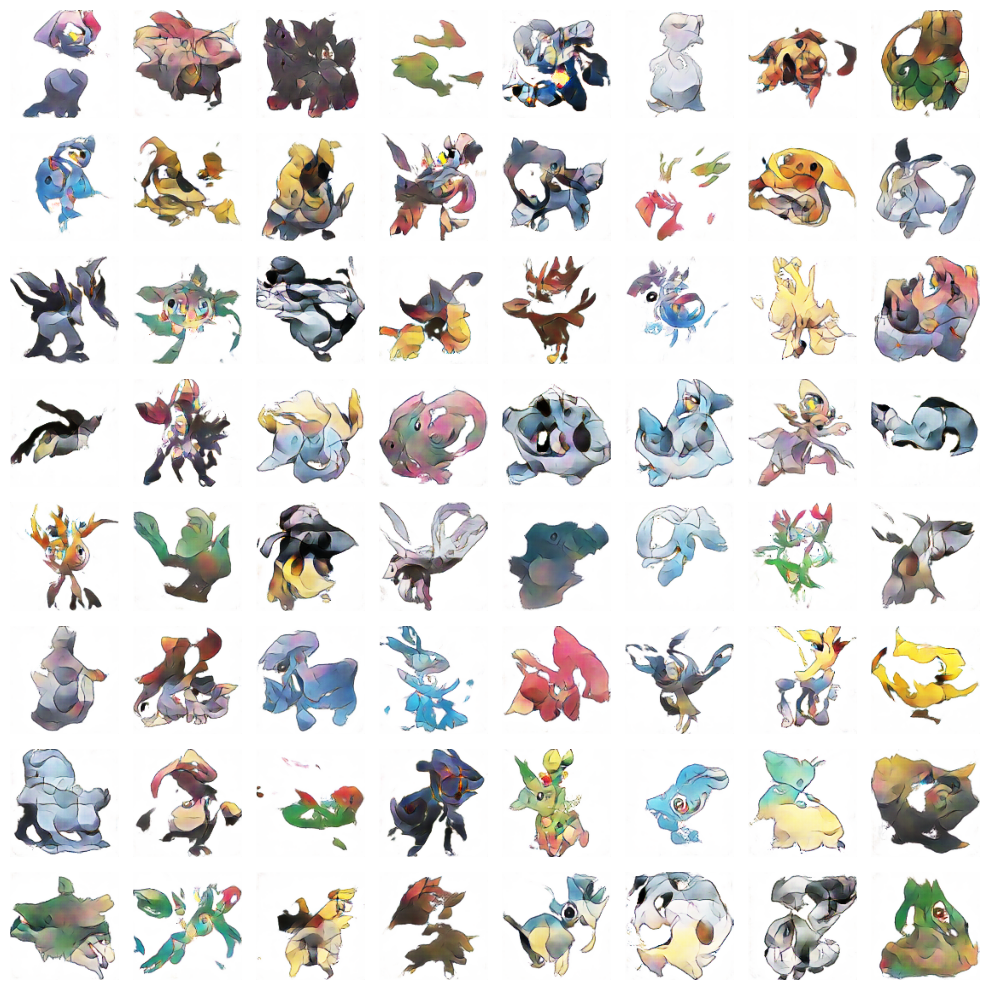

In [ ]:
visualize_thumbnails(npimages, rows=8, cols=8)

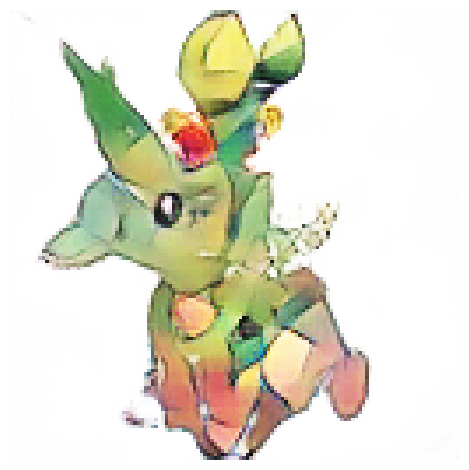

In [ ]:
image = npimages[11]
image = unnormalize_image(image)
plt.imshow(image)
plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

# Clean up endpoint

In [ ]:
predictor.delete_endpoint()